In [1]:
import scanpy as sc
import harmonypy as hm
import pandas as pd
import anndata as ad
import numpy as np
import scrublet
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Celltypist
import celltypist
from celltypist import models

In [2]:
Lyko = sc.read("Anndata/GSE218170.h5ad")
Ji = sc.read("Anndata/GSE144236.h5ad")
Yost = sc.read("Anndata/GSE123813.h5ad")
Zou = sc.read("Anndata/GSE193304.h5ad")

#Downloaad skin model
models.download_models(model = 'Adult_Human_Skin.pkl')
Skin_Model = models.Model.load(model = 'Adult_Human_Skin.pkl')

📂 Storing models in /data/home/ha20577/.celltypist/data/models
💾 Total models to download: 1
⏩ Skipping [1/1]: Adult_Human_Skin.pkl (file exists)


#   Yost

In [3]:
Yost.obs_names_make_unique()
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(Yost, target_sum=1e4)

sc.pp.log1p(Yost)

predictions = celltypist.annotate(Yost, model=Skin_Model, majority_voting=True)
Yost.obs['celltypist_labels'] = predictions.predicted_labels['predicted_labels']

🔬 Input data has 26016 cells and 18347 genes
🔗 Matching reference genes in the model
🧬 2911 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [4]:
Yost.obs

,Patient,treatment,cluster,UMAP1,UMAP2,Condition,celltypist_labels
AAACCTGCATGTTCCC,su010,pre,CD8_naive,-5.055816,3.093178,Tumour,Tc
AAACGGGAGGACAGAA,su010,pre,CD8_naive,-4.361540,2.970602,Tumour,Tc
AAACGGGCAAGTCTAC,su010,pre,Th17,2.955230,-4.796993,Tumour,Th
AAACGGGGTAGTACCT,su010,pre,CD8_naive,-4.597772,2.647269,Tumour,Tc
AAACGGGGTGATAAAC,su010,pre,CD8_naive,-3.909451,3.647786,Tumour,Tc
...,...,...,...,...,...,...,...
TTTACTGTCACTCCTG,su014,post,CD8_eff,-5.676641,-0.858432,Tumour,Tc
TTTCCTCCATCGGAAG,su014,post,Th17,1.642686,-5.324915,Tumour,NK
TTTGCGCTCAAACCGT,su014,post,Th17,2.333773,-5.540516,Tumour,Th
TTTGGTTTCTTTACGT,su014,post,CD8_mem,-5.674574,-0.213086,Tumour,Tc


#### Lyko

In [5]:
Lyko.obs_names_make_unique()
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(Lyko, target_sum=1e4)

sc.pp.log1p(Lyko)

predictions = celltypist.annotate(Lyko, model=Skin_Model, majority_voting=True)
Lyko.obs['celltypist_labels'] = predictions.predicted_labels['predicted_labels']

🔬 Input data has 136490 cells and 32738 genes
🔗 Matching reference genes in the model
🧬 3096 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


In [6]:
Lyko.obs

,orig.ident,nCount_RNA,nFeature_RNA,batch,Condition,Patient,celltypist_labels
AAACCTGAGAAACCTA,SeuratProject,2162.0,780,GSM6735856,Normal,P11,VE1
AAACCTGAGCATCATC,SeuratProject,20485.0,2990,GSM6735856,Normal,P11,Differentiated_KC
AAACCTGAGCGGATCA,SeuratProject,3853.0,1373,GSM6735856,Normal,P11,F2
AAACCTGAGCTCAACT,SeuratProject,20101.0,3951,GSM6735856,Normal,P11,F2
AAACCTGAGCTCCTTC,SeuratProject,1116.0,489,GSM6735856,Normal,P11,F2
...,...,...,...,...,...,...,...
TTTGTCAGTTTGTTTC,SeuratProject,797.0,435,GSM6735866,Tumor,P21,Th
TTTGTCATCACCAGGC,SeuratProject,1225.0,590,GSM6735866,Tumor,P21,DC2
TTTGTCATCCATTCTA,SeuratProject,1677.0,617,GSM6735866,Tumor,P21,VE1
TTTGTCATCCCAGGTG,SeuratProject,1965.0,697,GSM6735866,Tumor,P21,NK


### JI

In [7]:
Ji.obs_names_make_unique()
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(Ji, target_sum=1e4)

sc.pp.log1p(Ji)

predictions = celltypist.annotate(Ji, model=Skin_Model, majority_voting=True)
Ji.obs['celltypist_labels'] = predictions.predicted_labels['predicted_labels']

🔬 Input data has 48164 cells and 32740 genes
🔗 Matching reference genes in the model
🧬 3096 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [8]:
Ji.obs

,nCount_RNA,nFeature_RNA,Patient,Condition,level1_celltype,level2_celltype,level3_celltype,celltypist_labels
P1_Tumor_AAACCTGAGTCAAGCG,40856,5206,P1,Tumor,Epithelial,Tumor_KC_Diff,Tumor_KC_Diff,Differentiated_KC
P1_Tumor_AAACCTGCAAATTGCC,15511,3468,P1,Tumor,Epithelial,Keratinocyte,Keratinocyte,Undifferentiated_KC
P1_Tumor_AAACCTGGTAGGAGTC,24652,4154,P1,Tumor,Epithelial,Tumor_KC_Basal,Tumor_KC_Basal,Differentiated_KC
P1_Tumor_AAACGGGAGATGTAAC,27554,4334,P1,Tumor,Epithelial,Tumor_KC_Basal,Tumor_KC_Basal,Undifferentiated_KC
P1_Tumor_AAACGGGAGCTGCAAG,24980,4822,P1,Tumor,Epithelial,Tumor_KC_Cyc,Tumor_KC_Cyc,Differentiated_KC
...,...,...,...,...,...,...,...,...
P10_Normal_TTTGTCAAGAGTCTGG,5585,1659,P10,Normal,Epithelial,Normal_KC_Diff,Normal_KC_Diff,Differentiated_KC
P10_Normal_TTTGTCAAGTCGTTTG,14207,3541,P10,Normal,LC,LC,LC,LC
P10_Normal_TTTGTCACAGTGGGAT,10068,2540,P10,Normal,LC,LC,LC,migLC
P10_Normal_TTTGTCATCCAGGGCT,5223,1849,P10,Normal,LC,LC,LC,LC


### Zou

In [9]:
Zou.obs_names_make_unique()
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(Zou, target_sum=1e4)

sc.pp.log1p(Zou)

predictions = celltypist.annotate(Zou, model=Skin_Model, majority_voting=True)
Zou.obs['celltypist_labels'] = predictions.predicted_labels['predicted_labels']

🔬 Input data has 134382 cells and 33538 genes
🔗 Matching reference genes in the model
🧬 3295 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


In [10]:
Zou.obs

,batch,Patient,Condition,celltypist_labels
AAACCCAAGTCCCGGT-1,GSM5788492_S2_filtered_feature_bc_matrix,P22,Normal,Differentiated_KC
AAACCCACAAGAGGCT-1,GSM5788492_S2_filtered_feature_bc_matrix,P22,Normal,Differentiated_KC
AAACCCACAAGCCATT-1,GSM5788492_S2_filtered_feature_bc_matrix,P22,Normal,Differentiated_KC
AAACCCACACGCGTCA-1,GSM5788492_S2_filtered_feature_bc_matrix,P22,Normal,Differentiated_KC
AAACCCACACGTAGTT-1,GSM5788492_S2_filtered_feature_bc_matrix,P22,Normal,Differentiated_KC
...,...,...,...,...
TTTGTTGCAGTGTATC-1,GSM5788503_S13_filtered_feature_bc_matrix,P27,Normal,Differentiated_KC
TTTGTTGGTCAGGTAG-1,GSM5788503_S13_filtered_feature_bc_matrix,P27,Normal,Melanocyte
TTTGTTGTCCCATTCG-1,GSM5788503_S13_filtered_feature_bc_matrix,P27,Normal,Differentiated_KC
TTTGTTGTCTCTATAC-1,GSM5788503_S13_filtered_feature_bc_matrix,P27,Normal,Differentiated_KC


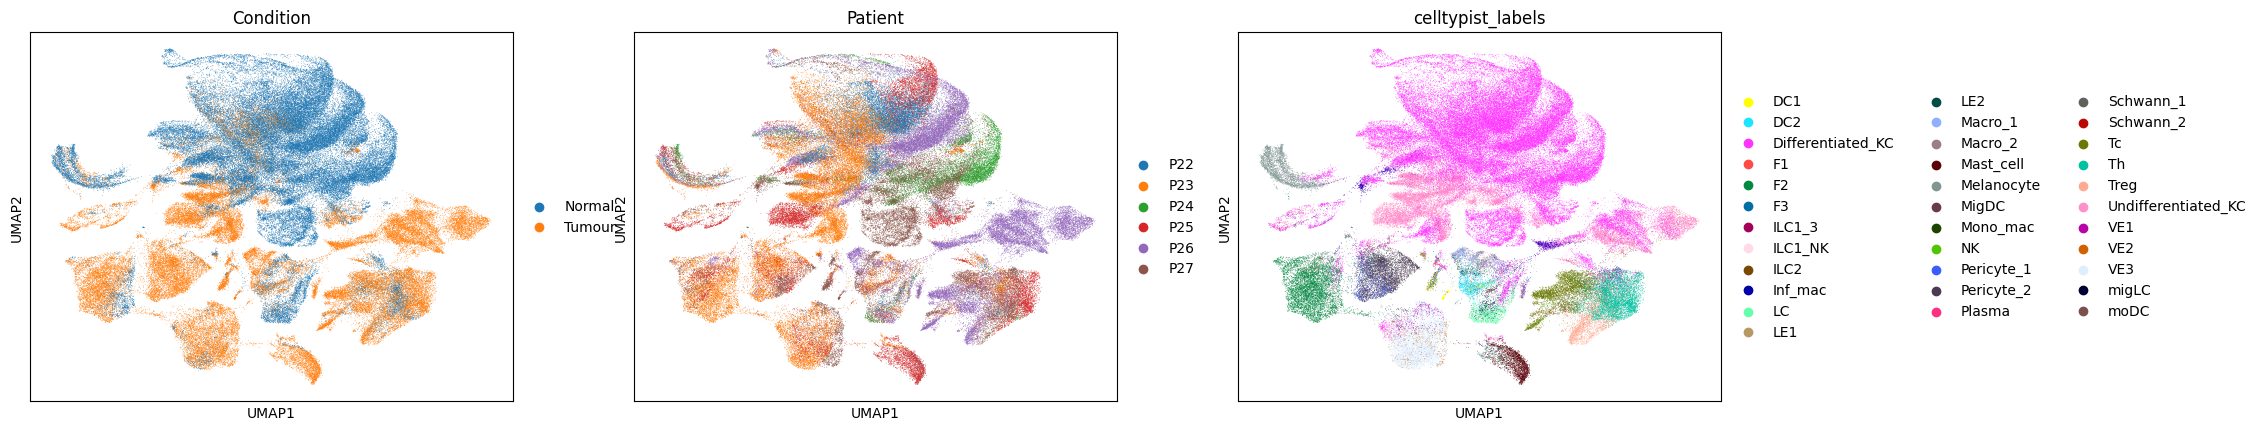

In [11]:
sc.tl.umap(Zou)
sc.pl.umap(Zou, color=["Condition", 'Patient', 'celltypist_labels'], color_map="viridis")

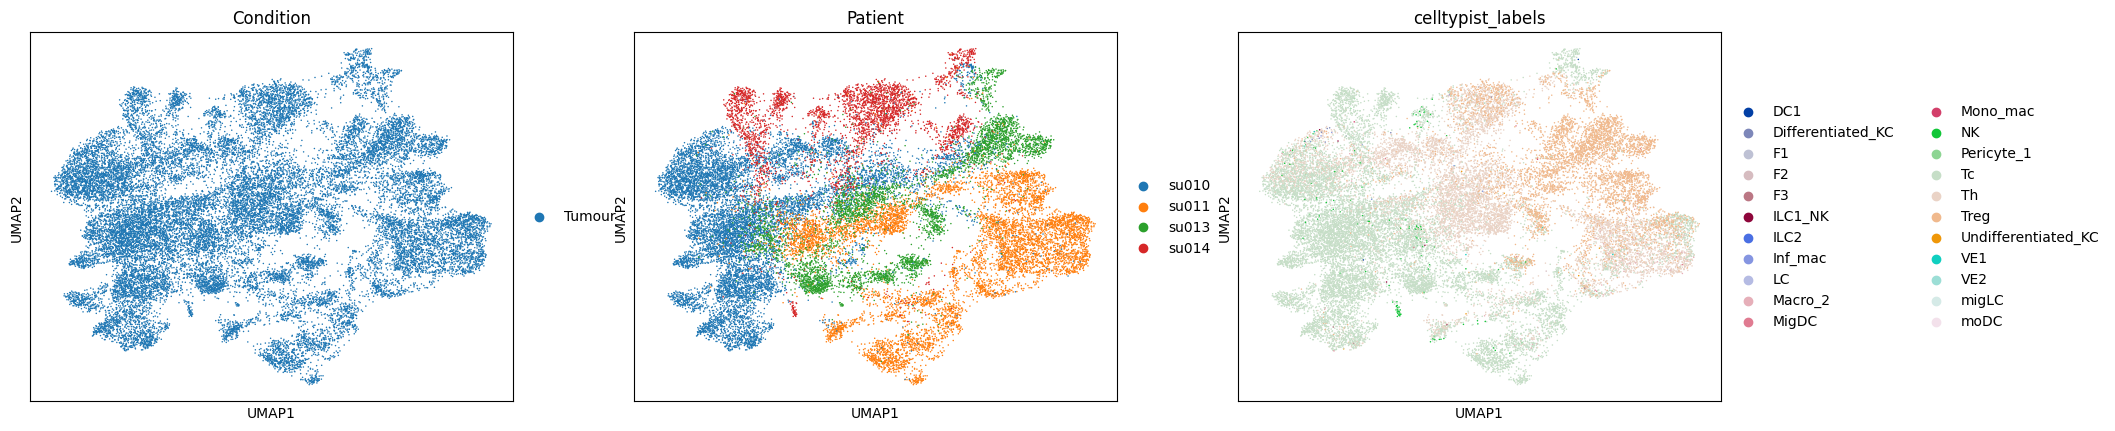

In [12]:
sc.tl.umap(Yost)
sc.pl.umap(Yost, color=["Condition", 'Patient', 'celltypist_labels'], color_map="viridis")

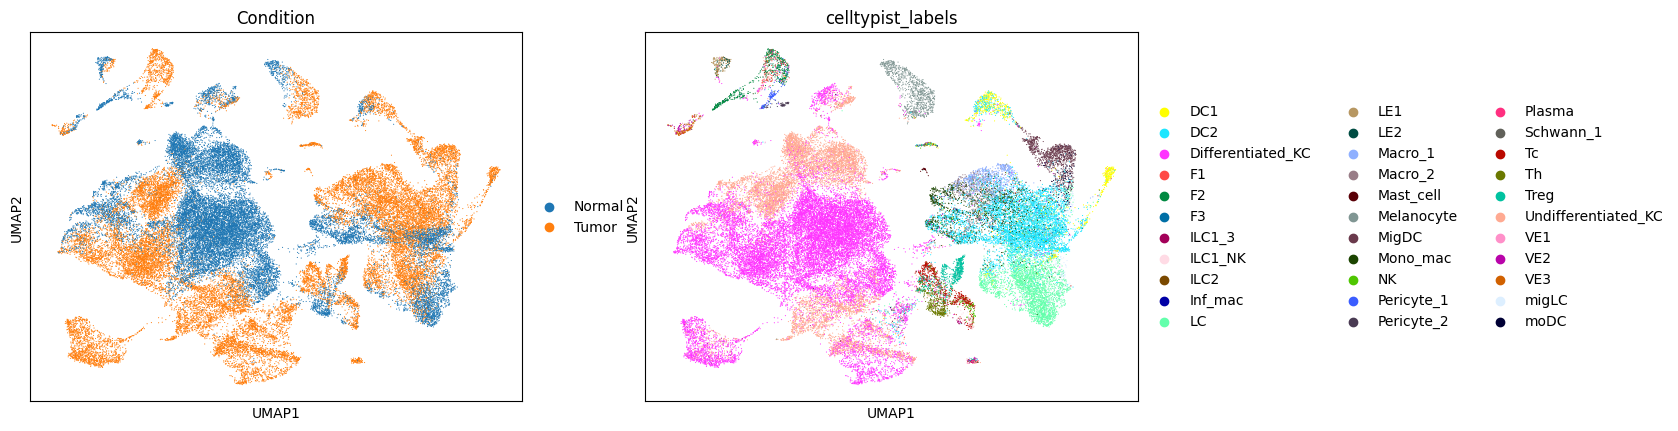

In [13]:
sc.tl.umap(Ji)
sc.pl.umap(Ji, color=["Condition", 'celltypist_labels'], color_map="viridis")

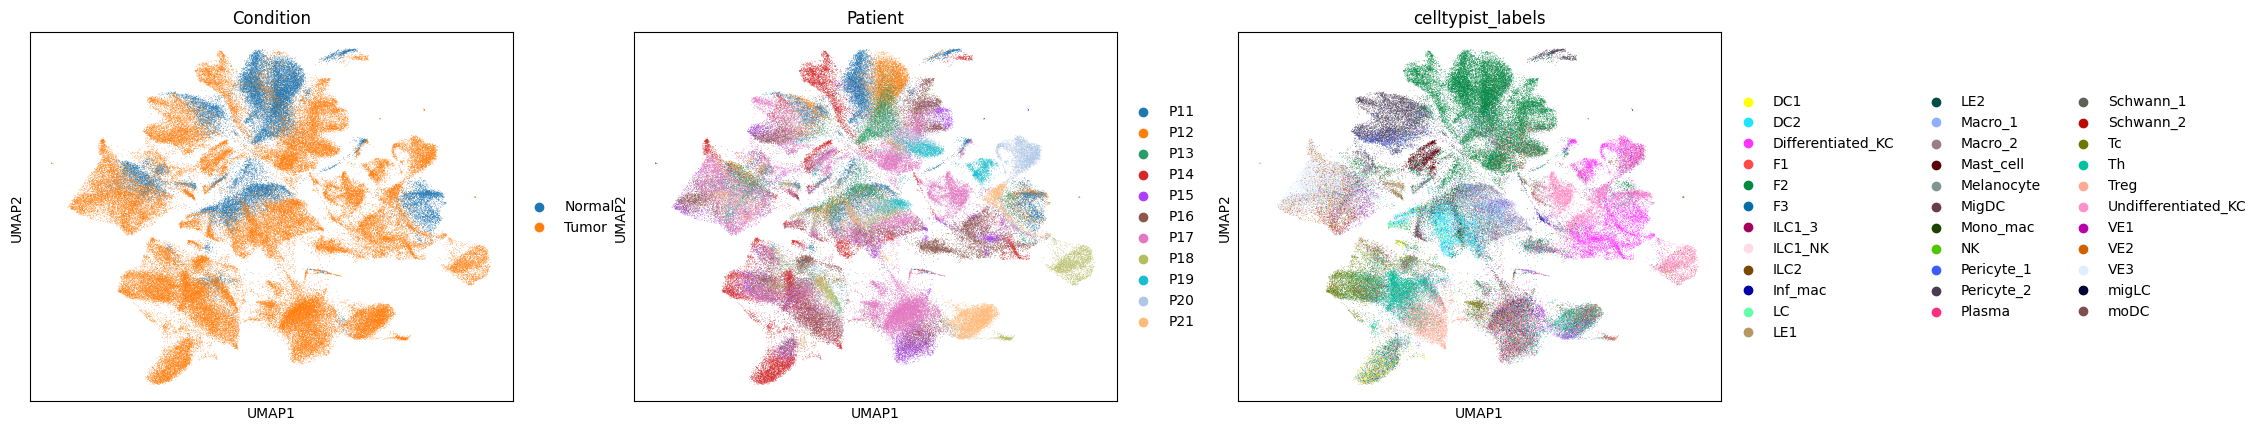

In [14]:
sc.tl.umap(Lyko)
sc.pl.umap(Lyko, color=["Condition", 'Patient', 'celltypist_labels'], color_map="viridis")